<a href="https://colab.research.google.com/github/swopnimghimire-123123/Machine-Learning-Journey/blob/main/36.1_Arbitary_Value_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("/content/36_titanic_toy.csv")

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
# this shows the percentage of missing value
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [6]:
X = df.drop(columns="Survived")
y = df["Survived"]

In [7]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [12]:
print("Original Age Variable variance:", X_train["Age"].var())
print("\nAge Variance after 99 imputation:", X_train["Age_99"].var())
print("\nAge Variance after -1 imputation:", X_train["Age_minus1"].var())

print("\nOriginal Fare variable variance:",X_train["Fare"].var())
print("\nFare variance after 999 imputation:",X_train["Fare_999"].var())
print("\nFare variance after -1 imputation:",X_train["Fare_minus1"].var())

Original Age Variable variance: 204.3495133904614

Age Variance after 99 imputation: 951.7275570187172

Age Variance after -1 imputation: 318.0896202624484

Original Fare variable variance: 2448.197913706318

Fare variance after 999 imputation: 47219.20265217623

Fare variance after -1 imputation: 2378.5676784883503


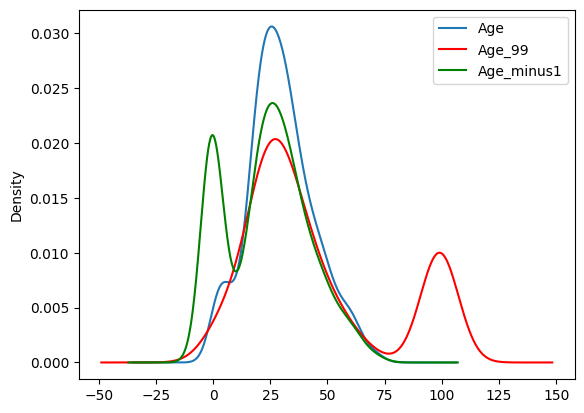

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

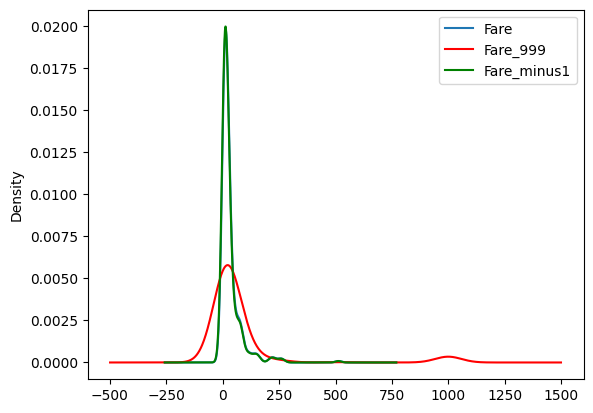

In [14]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [15]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [16]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


### Using Sklearn

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [18]:
imputer1 = SimpleImputer(strategy="constant", fill_value=99)
imputer2 = SimpleImputer(strategy="constant", fill_value=999)

In [19]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
] , remainder = "passthrough")

In [20]:
trf.fit(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [21]:

trf.named_transformers_['imputer1'].statistics_

array([99.])

In [22]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [23]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [24]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])